In [1]:
import torch
from aging.size_norm.models import Autoencoder, UNet, EfficientUNet

In [2]:
# max depth is 4
mdl = Autoencoder(4, 2, 1, 2, 1.3, 16, separable=True, double_conv=False)

In [3]:
mdl(torch.rand(1, 1, 80, 80)).shape

torch.Size([1, 1, 80, 80])

In [4]:
sum(x.numel() for x in mdl.parameters() if x.requires_grad)

1903

In [5]:
# max depth is 4
mdl = UNet(4, 2, 1, 2, 1.3, 16, separable=True, double_conv=False)

In [6]:
mdl(torch.rand(1, 1, 80, 80)).shape

torch.Size([1, 1, 80, 80])

In [7]:
sum(x.numel() for x in mdl.parameters() if x.requires_grad)

2543

In [9]:
import h5py
import matplotlib.pyplot as plt

In [2]:
from aging.size_norm.data import TrainingPaths

In [4]:
training='/n/groups/datta/win/longtogeny/data/size_network/training_data/3month-male-multi_animal_training_data.h5'

In [7]:
with h5py.File(training, 'r') as h5f:
    frame = h5f['training_frames'][0]

In [8]:
frame.shape

(80, 80)

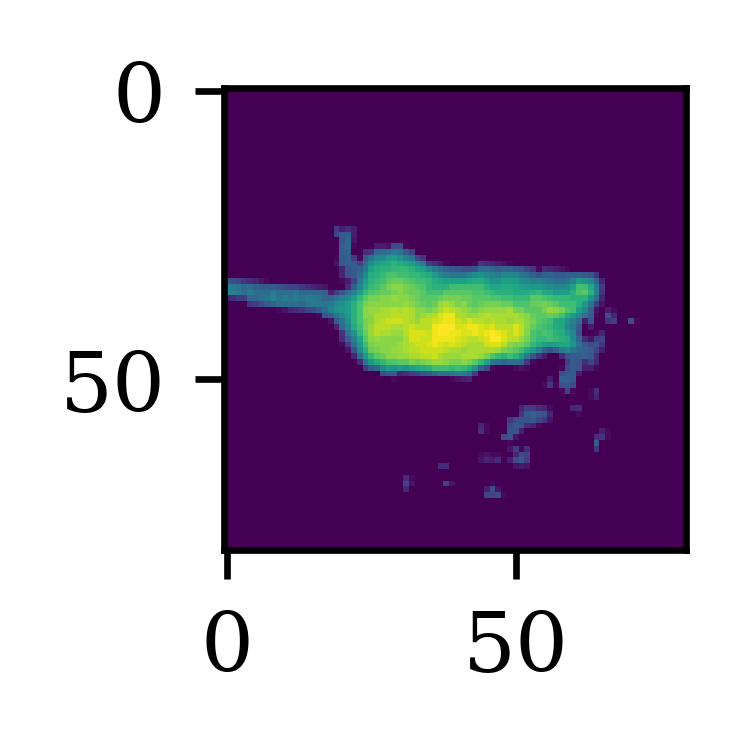

In [11]:
plt.figure(figsize=(1, 1))
plt.imshow(frame)

In [16]:
from kornia.augmentation import RandomElasticTransform
import torch

In [227]:
xf = RandomElasticTransform(kernel_size=(61,)*2, sigma=(9,)*2, alpha=(2,) *2, p=1)

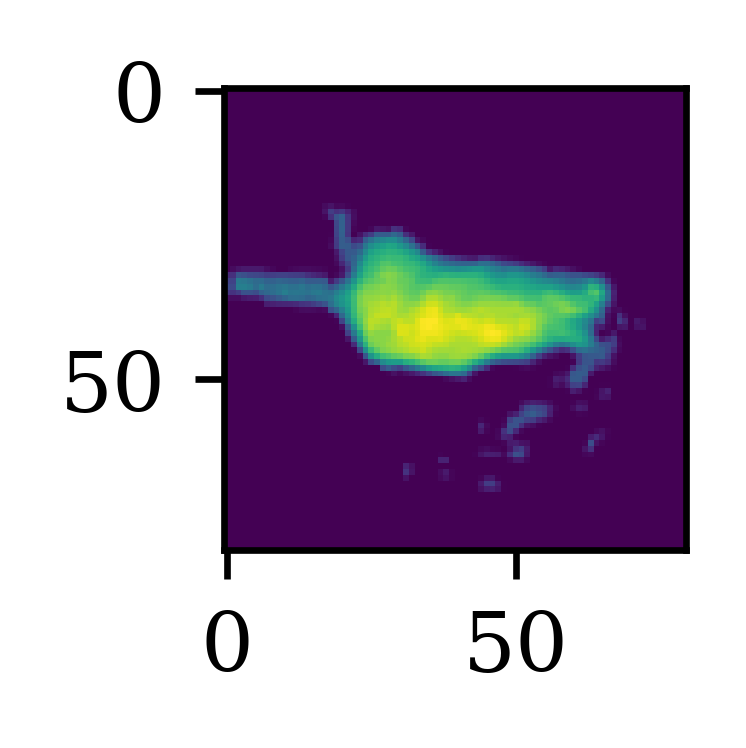

In [230]:
plt.figure(figsize=(1, 1))
plt.imshow(xf(torch.tensor(frame[None], dtype=torch.float32)).squeeze())

In [1]:
import torch
from aging.size_norm.models import EfficientUNet

In [2]:
# max depth is 4
mdl = EfficientUNet(3, 2, 1, 2, 2, 8)

In [3]:
mdl(torch.rand(1, 1, 80, 80)).shape

torch.Size([1, 1, 80, 80])

In [4]:
sum(x.numel() for x in mdl.parameters() if x.requires_grad)

18359